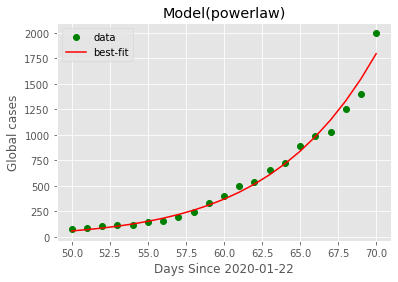

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from lmfit import models
import os
import sys
sys.path.insert(0, os.path.abspath('../lib'))
import c19all

# See https://lmfit.github.io/lmfit-py/builtin_models.html for model options
count_of = 'cases'
df = c19all.df_all[count_of]
df = c19all.for_country(df, 'India')
df = df[df.day >= 50]
df = df.groupby('day').sum().reset_index()
model = models.PowerLawModel()
params = model.make_params()
result = model.fit(df[count_of], params, x=df.day.to_list())
plt.style.use('ggplot')
result.plot_fit(xlabel='Days Since 2020-01-22', ylabel=f'Global {count_of}', datafmt='og', fitfmt='r')